In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

from fastai import *
from fastai.vision import *

torch.backends.cudnn.benchmark=True

In [2]:
root_model_path = Path("/data/students_home/fmameli/repos/Artifact_Removal_GAN/models/")
exported_model = Path("/data/students_home/fmameli/repos/Artifact_Removal_GAN/models/standard.pkl")
learner = load_learner(path=root_model_path, file=exported_model)

In [4]:
def toEven(sz):
    tempSz = [sz[0], sz[1]]
    if sz[0]%2 != 0:
        tempSz[0] += 1
    if sz[1]%2 != 0:
        tempSz[1] += 1
    return tempSz

def get_dummy_databunch(bs: int, sz: int):
    """Returns sz databunch
    """
    path = Path('./dataset/dummy/')
    src = ImageImageList.from_folder(path).split_none()

    data = (src.label_from_func(
        lambda x: path/(x.name.replace(".jpg", ".png"))
    ).transform(
        size=sz,
        tfm_y=True
    ).databunch(bs=bs, num_workers=1, no_check=True)
        .normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data

In [7]:
img_low = open_image("./imgs/0416_base.jpg")
img_size = toEven(img_low.size)
data_gen = get_dummy_databunch(1, img_size)
learner.data = data_gen
p,img_hr,b = learner.predict(img_low)

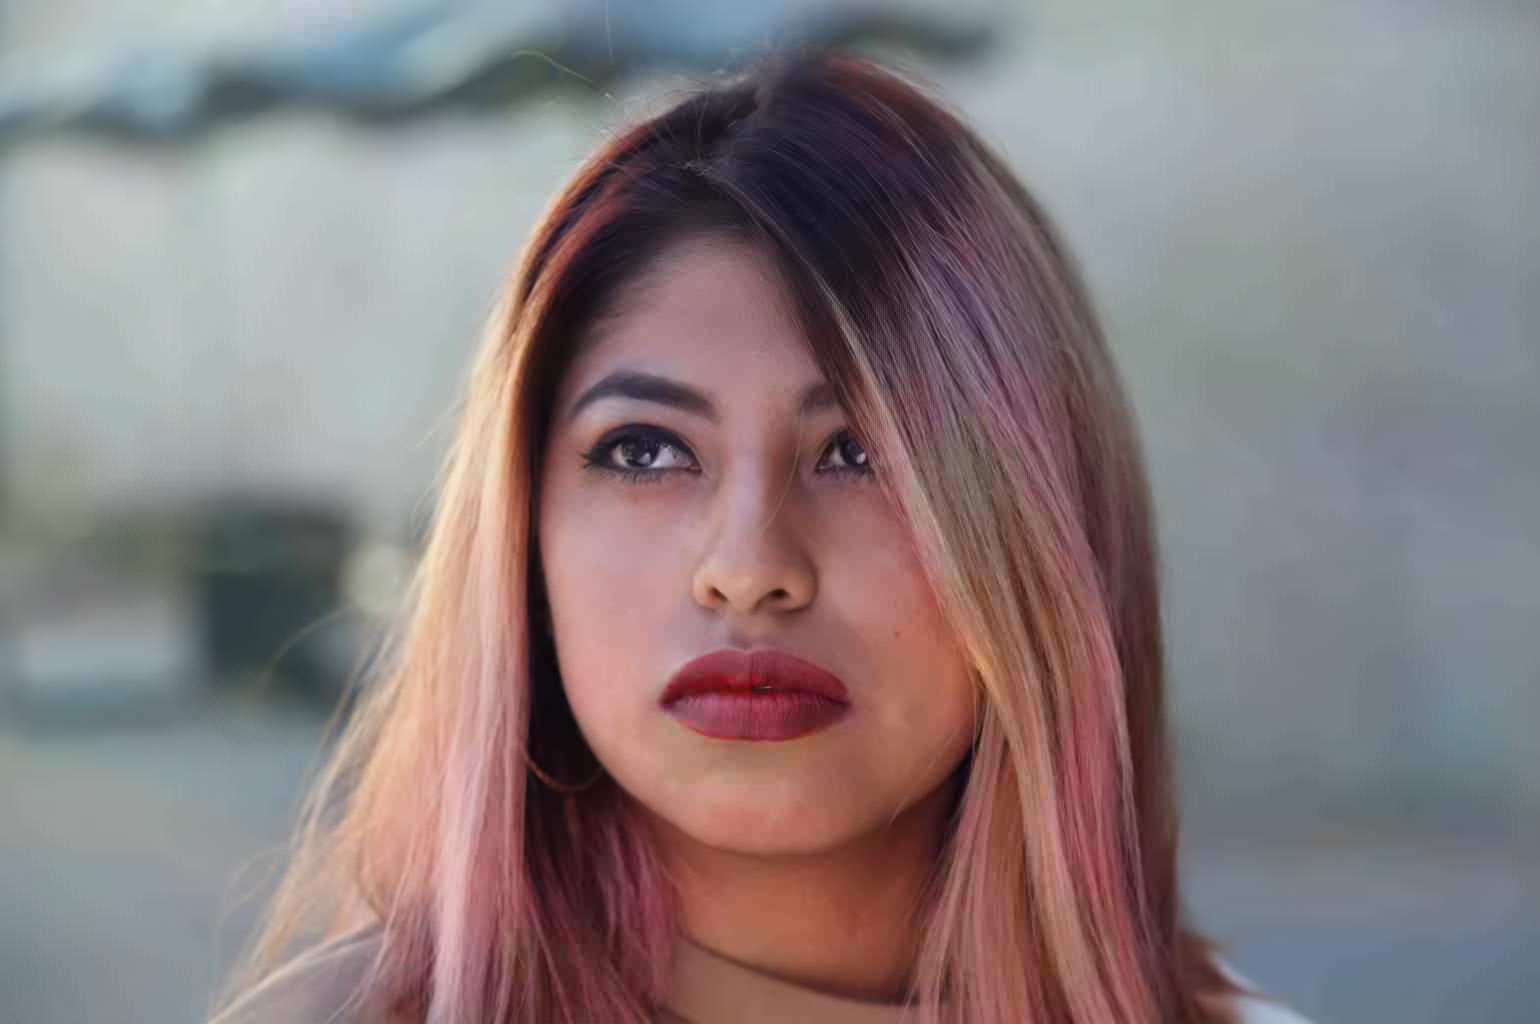

In [8]:
p